In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# безмоментное решение

## сферическая оболочка 1

In [ ]:
# consts
E = 71 * 1e+7
μ = 0.3

# цилиндрическая оболочка 1
# data from task
# R = 1; R_0 = 1.26
# H = 3 * 1.05
# Y = 0.6 / 3  
# qv = 0.5 * 1.05
# h1 = 1 / 260 * 1.05
# h2 = 1 / 440 * 1.05
# h3 = 1 / 170 * 1.05
# fi1 = np.pi / 2
# fi2 = np.radians(44.1)
# fi3 = np.pi / 2

R = 1; R_0 = 2 ** 0.5
H = 4
Y = 0.5 / 4  
qv = 0.5
h1 = 1 / 250
h2 = R_0 / 400
h3 = 1 / 150
fi1 = np.pi / 2
fi2 = np.radians(45)
fi3 = np.pi / 2


In [ ]:
def n1_1_obka():
    return (np.pi - 2 * np.pi * qv) / 2 / np.pi

def n2_1_obka(x):
    return 1 if x > H else 1 + Y * (H - x)

def w1(n2, n1 = n1_1_obka()):
    return - 1 / h1 * (n2 - 0.3 * n1)

def nu1():
    dpdx = - Y
    return 1 ** 2 / h1 * dpdx

In [ ]:
print(f'Усилия в срединной поверхности\n\tN1 = {n1_1_obka()}\
    \n\tN2 = {n2_1_obka(x = 0)}, x = 0\
    \n\tN2 = {n2_1_obka(x = H)}, x = H')

print('Радиальное перемещение и угол поворота на краю х = 0 оболочки')
print(f'\t δ1 = {-w1(n2 = n2_1_obka(x = 0))}')
print(f'\t v1 = {nu1()}')

# осевая составляющая погонной силы n1
V1 = n1_1_obka() * np.sin(fi1)
print(f'осевая составляющая V1 погонной силы N1 = {V1}')

## сферическая оболочка 2

In [ ]:
# fi2 == fi0 -> True

def find_p_2_obka(fi):
    return 1 + Y * H + Y * R_0 * np.cos(fi) - Y * R_0 * np.cos(fi2)

def n1_2_obka(fi):
    if fi == 0:
        trigr = 3 / 2
    else:
        trigr = (1 - np.cos(fi) ** 3) / (np.sin(fi) ** 2)
#     return R_0 / 2 * (1 + Y * (H - R_0 * np.cos(fi2))) + (Y * trigr * R_0) / 3 
    return R_0 / 2 * (1 + Y * (H - R_0 * np.cos(fi2))) + (Y * trigr * R_0 ** 2) / 3 

def n2_2_obka(fi):
    return find_p_2_obka(fi) * R_0 - n1_2_obka(fi)

In [ ]:
print(f'N1 with fi = fi0 = {np.degrees(fi2)} \n\t{n1_2_obka(fi2)}')
print(f'N1 with fi = 0 \n\t{n1_2_obka(0)}')

print(f'N2 with fi = fi0 = {np.degrees(fi2)} \n\t{n2_2_obka(fi2)}')
print(f'N2 with fi = 0 \n\t{n2_2_obka(0)}')

### радиальное смещение и угол поворота

In [ ]:
def find_e2r2(fi):
    return  R_0 / h2 * (n2_2_obka(fi) - 0.3 * n1_2_obka(fi))

def w2(fi):
    return find_e2r2(fi) * np.sin(fi)

def nu2(fi):
    return Y * R_0 ** 2 / h2 * np.sin(fi)

In [ ]:
print(f'радиальное перемещение и угол поворота на краю')
print('\tdelta2', w2(fi = fi2))
print('\tnu2', nu2(fi = fi2))

In [ ]:
# np.degrees(fi2)

In [ ]:
# радиадьная составляющая погонной силы n1
H2 = n1_2_obka(fi2) * np.cos(fi2)
print(f'радиадьная составляющая H2 погонной силы N1 на краю = {H2}')

# осевая составляющая погонной силы n1
V2 = n1_2_obka(fi2) * np.sin(fi2)
print(f'осевая составляющая V2 погонной силы N1 на краю = {V2}')

# assert n1_2_obka(fi2) == (H2 ** 2 + V2 ** 2) ** 0.5

## цилиндрическая оболочка 3

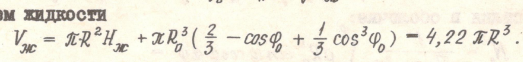

In [ ]:
def value():
    return (np.pi * H * 1 ** 2 + (np.pi * R_0 ** 3) * (2/3 - np.cos(fi2) + 1/3 * np.cos(fi2) ** 3)) / np.pi
def q_down():
    return qv + Y * value() / 2 
print(f'объем =\n\t={value()}')
print(f'n1 = -q_нижнее =\n\t={-q_down()}')


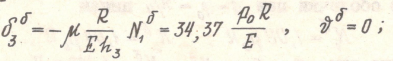

In [ ]:
def n1_3_obka():
    return -q_down()

def w3():
    return -0.3 * n1_3_obka() / h3 

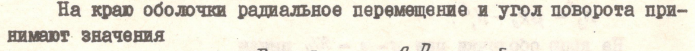

In [ ]:
# 0.3 * 0.7637 / h3

In [ ]:
w3(), 0

# Определим краевой эффект

## k, D, betta x R

In [ ]:
class geom:
    def __init__(self, R, h, fi, mu = 0.3):
        self.R = R
        self.h = h
        self.fi = fi
        self.mu = mu
        
    def find_D(self):
        return self.h ** 3 / 12 / (1 - self.mu ** 2)
    def find_b_4(self):
        return 3 * (1 - self.mu ** 2) / ((self.R ** 2) * (self.h ** 2))
    def find_k11(self):
        return 4 * self.find_D() * self.find_b_4() ** (3/4) / (np.sin(self.fi) ** 2)
    def find_k12(self):
        return 2 * self.find_D() * self.find_b_4() ** (1/2) / np.sin(self.fi)
    def find_k22(self):
        return 2 * self.find_D() * self.find_b_4() ** (1/4)
    def find_b(self):
        return self.find_b_4() ** (1/4)
    
    def ret(self):
        print(f'D = {self.find_D()}')
        print(f'b = {self.find_b()}')
        print(f'k11 = {self.find_k11()}')
        print(f'k12 = {self.find_k12()}')
        print(f'k22 = {self.find_k22()}')

In [ ]:
solve_1 = geom(R, h1, fi1)
# solve_1 = geom(1, 1/260, np.radians(90))
solve_1.ret()

In [ ]:
solve_2 = geom(R_0, h2, fi2)
# solve_2 = geom(1.26, 1.26/440, np.radians(44.1))
solve_2.ret()

In [ ]:
solve_3 = geom(R, h3, fi3)
# solve_3 = geom(1, 1/170, np.radians(90))
solve_3.ret()

## C11, C12, C21, C22

In [ ]:
n11, n12, n13 = n1_1_obka(), n1_2_obka(fi2), n1_3_obka()
d = 1 / 20
r_sh = 1 - d / 3

u1 = -w1(n2_1_obka(x = 0)); u2 = w2(fi2); u3 = w3()
v1 = nu1(); v2 = nu2(fi2); v3 = 0

a1 = b2 = 2 * d / 3
b1 = a2 = a3 = b3 = d/3

f_sh = 1/2 * (d ** 2); i_sh = (d ** 4) / 36 

r2 = 1 - d

k11_1 = solve_1.find_k11()
k12_1 = solve_1.find_k12()
k11_2 = solve_2.find_k11()
k12_2 = solve_2.find_k12()
k11_3 = solve_3.find_k11()    
k12_3 = solve_3.find_k12()
k22_1 = solve_1.find_k22()
k22_2 = solve_2.find_k22()
k22_3 = solve_3.find_k22()

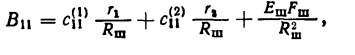

In [ ]:
# поиск с11
def find_c11():
    return k11_1 * 1 / r_sh + \
            k11_2 * r2 / r_sh +\
            f_sh / (r_sh **2) +\
            k11_3 * 1 / r_sh
c11 = find_c11()
c11

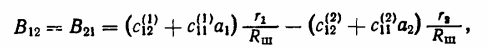

In [ ]:
# # поиск с12
# def find_c12():
#     return ((k12_1 + k11_1 * a1) * 1 / r_sh) -\
#     ((k12_2 + k11_2 * a2) * r2 / r_sh) -\
#     ((k12_3 + k11_3 * a3) * 1 / r_sh)
# c12 = find_c12()
# c12

In [ ]:
# поиск с12
def find_c12():
    return -((k12_1 + k11_1 * a1) * 1 / r_sh) +\
    ((k12_2 + k11_2 * a2) * r2 / r_sh) +\
    ((k12_3 + k11_3 * a3) * 1 / r_sh)
c12 = find_c12()
c12

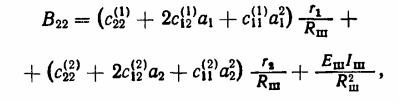

In [ ]:
# поиск с22
def find_i_sh():
    return 1 / 36 * d ** 4
def find_c22():
    return ((k22_1 + 2 * k12_1 * a1 + k11_1 * a1**2) * 1 / r_sh)+\
        ((k22_2 + 2 * k12_2 * a2 + k11_2 * a2 ** 2) * r2 /r_sh)+\
        ((k22_3 + 2 * k12_3 * a2 + k11_3 * a2 ** 2) * 1 / r_sh)+\
        find_i_sh() / (r_sh**2)
c22 = find_c22()
c22

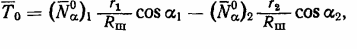


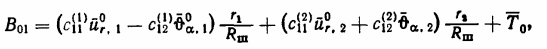

In [ ]:
# поиск с01
def find_t0(fi1, fi2, fi3):
    return n11 * 1 / r_sh * np.cos(fi1) - \
            n12 * r2 / r_sh * np.cos(fi2) + \
            n13 * 1 / r_sh * np.cos(fi3)

print(f'T_0 = {find_t0(fi1, fi2, fi3)}')

def find_c01():
# v3 = 0, поэтому нет разницы, какой знак перед k12_3
    return  (k11_1 * u1 + k12_1 * v1) * 1 / r_sh +\
            (k11_2 * u2 + k12_2 * v2) * r2 / r_sh +\
            (k11_3 * u3 - k12_3 * v3) * 1 / r_sh +\
            find_t0(fi1, fi2, fi3)
c01 = find_c01()
print(f'с01 = {c01}')

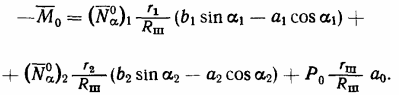
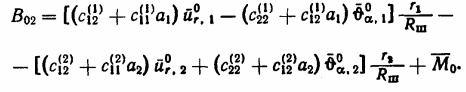

In [ ]:
def find_m0(signs):
    return - (signs[0] * (n11 * 1 / r_sh * (b1 * np.sin(fi1) - a1 * np.cos(fi1))) + \
             (signs[1] * n12 * 1 / r_sh * (b2 * np.sin(fi2) - a2 * np.cos(fi2))) + \
             (signs[2] * n13 * 1 / r_sh * (b3 * np.sin(fi3) - a3 * np.cos(fi3))))

lst_of_signs, signs = [-1, -1, -1, 1, 1, 1], [1, -1, 1]

def find_c02(lst_of_signs, signs):
# v3 = 0, поэтому нет разницы, какой знак перед v3
    return  (lst_of_signs[0] * (k12_1 + k11_1 * a1) * u1 + lst_of_signs[1] * (k22_1 + k12_1 * a1) * v1) * 1 / r_sh + \
            (lst_of_signs[2] * (k12_2 + k11_2 * a2) * u2 + lst_of_signs[3] * (k22_2 + k12_2 * a2) * v2) * r2 / r_sh + \
            (lst_of_signs[4] * (k12_3 + k11_3 * a2) * u3 - lst_of_signs[5] * (k22_3 + k12_3 * a3) * v3) * 1 / r_sh + \
            find_m0(signs)

c02 = find_c02(lst_of_signs, signs)
print(f'm0 = {find_m0(signs)}')
print(f'c02 = {c02}')

## Находим дельта ш и скорость ш

In [ ]:
# M1, B1 = np.array([[c11, -c12], [-c12, c22]]), np.array([c01, c02])
M1, B1 = np.array([[c11, c12], [c12, c22]]), np.array([c01, c02])
u_sh, v_sh = np.linalg.solve(M1, B1).tolist()
u_sh, v_sh

In [ ]:
# найдем дельта 1, 2, 3

## перемещения оболочек суммарные
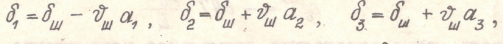

In [ ]:
def delta1():
    return u_sh - v_sh * a1
def delta2():
    return u_sh + v_sh * a2
def delta3():
    return u_sh + v_sh * a3
delta1_num, delta2_num, delta3_num = delta1(), delta2(), delta3()
delta1_num, delta2_num, delta3_num 

## С3 и С4

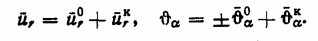
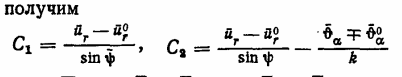
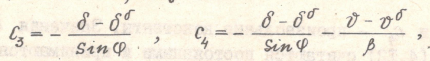
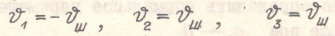

In [ ]:
# с3 по определению равно w^k

def c31():
    return - (delta1_num - u1) / np.sin(fi1)
def c32():
    return - (delta2_num - u2) / np.sin(fi2)
def c33():
    return - (delta3_num - u3) / np.sin(fi3)

betta1 = solve_1.find_b()
betta2 = solve_2.find_b()
betta3 = solve_3.find_b()

def c41():
    return c31() - ((-v_sh - v1) / betta1)
def c42():
    return c32() - ((v_sh - v2) / betta2)
def c43():
    return c33() - ((v_sh - v3) / betta3)

In [ ]:
c31_num = c31()
c32_num = c32()
c33_num = c33()
c41_num = c41()
c42_num = c42()
c43_num = c43()

In [ ]:
print(f'C3 для первой оболочки:\n\t{c31_num},\n\
C3 для второй оболочки:\n\t{c32_num},\n\
C3 для третьей оболочки:\n\t{c33_num}')

print(f'C4 для первой оболочки:\n\t{c41_num},\n\
C4 для второй оболочки:\n\t{c42_num},\n\
C4 для третьей оболочки:\n\t{c43_num}')


## странные хуйни из 4.12

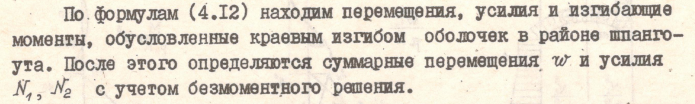
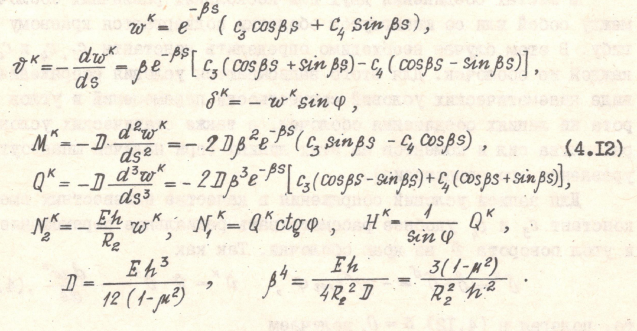
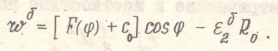

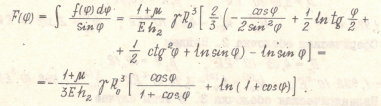
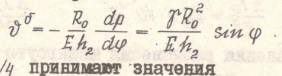


In [ ]:
def wk(betta, c3, c4, s):
#     необходимо указать дуговую координату и константы для каждой из оболочек
    return np.exp(-betta * s) * (c3 * np.cos(betta * s) + c4 * np.sin(betta * s))

def mk(D, betta, s, c3, c4):
    return - 2 * D * betta ** 2 * np.exp(-betta * s) * (c3 * np.sin(betta * s) - c4 * np.cos(betta * s))

def Qk(D, betta, s, c3, c4):
    return - 2 * D * betta ** 3 * np.exp(-betta * s) * (c3 * (np.cos(betta * s) - np.sin(betta * s)) + 
                                                        c4 * (np.cos(betta * s) + np.sin(betta * s)))

def n1_k(D, betta, s, c3, c4, fi):
    return Qk(D, betta, s, c3, c4) * np.cos(fi) / np.sin(fi)

def n2_k(h, R_2, betta, c3, c4, s):
    return - h / R_2 * wk(betta, c3, c4, s)

In [ ]:
osevoe2 = -v_sh * d
def find_big_f(fi2):
    return - (1 + 0.3) / 3 / h2 * Y * R_0 ** 3 * (np.cos(fi2) / (1 + np.cos(fi2)) + np.log(1 + np.cos(fi2)))
big_F = find_big_f(fi2)
c_0 = delta2_num * np.cos(fi2) / np.sin(fi2) - big_F + osevoe2

print('На краю оболочки')
print(f'осевое перемещение = {osevoe2}, большая F = {big_F}, C0 для второй оболочки = {c_0}')

In [ ]:
print('В полюсе')
print(f'большая F = {find_big_f(0)}, e2r2 = {find_e2r2(0)}')

In [ ]:
w2_fi_to_0 = (find_big_f(0) + c_0) * np.cos(0) - find_e2r2(0)
'нормальные перемещения в полюсе для второй оболочки',  w2_fi_to_0

## Графики ебучих **нормальных** перемещений

In [ ]:
s = np.arange(0, 0.3, 0.005)
wk_lst_1_obka = []; wk_lst_2_obka = []; wk_lst_3_obka = []
color1 = '#acc2d9'; color2 = '#ad900d'; color3 = '#983fb2'

for s_num in s:
    wk_lst_1_obka.append(wk(betta1, c31_num, c41_num, s_num) + (-u1))    
    wk_lst_2_obka.append(wk(betta2, c32_num, c42_num, s_num) + w2_fi_to_0)    
    wk_lst_3_obka.append(wk(betta3, c33_num, c43_num, s_num) + (-u3))    
    
figure = plt.figure(figsize = (9,9))
figure.patch.set_facecolor('xkcd:white')
plt.grid(True)
plt.plot(s, wk_lst_1_obka, label = 'w1', color = color1)
plt.plot(s, wk_lst_2_obka, label = 'w2', color = color2)
plt.plot(s, wk_lst_3_obka, label = 'w3', color = color3)


def plane(val, name, color = None):
    plane_ = np.zeros(s.shape) + val 
    if color:
        plt.plot(s, plane_,  label = name, color = color)
    plt.legend()
plane(0, 'zero', color = 'r')
plane(-u1, 'w1 bezm', color1)
plane(w2_fi_to_0, 'w2 bezm', color2)
plane(-u3, 'w3 bezm', color3)

plt.show()

In [ ]:
dot_of_start_2 = np.linalg.norm((osevoe2, delta2_num, u2))

In [ ]:
dot_of_start_2

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7))

fig.patch.set_facecolor('xkcd:white')

tup = ((wk_lst_1_obka, -u1, color1), (wk_lst_2_obka, w2_fi_to_0, color2), (wk_lst_3_obka, -u3, color3))

def plott(nums, bias, color):
    ax.plot(s, nums, color)
    ax.plot(s, np.zeros(s.shape))
    ax.grid(True)
    ax.plot(s, nums, color)
    ax.plot(s, np.zeros(s.shape) + bias, color)
    ax.set_ylim(-1100 , 800)
    ax.set_title(f'Перемещения {i + 1} оболочки')

for i, ax in enumerate(fig.axes):
    nums, bias, color = tup[i]
    plott(nums, bias, color)

plt.show()

## графики **ебучих** моментов

In [ ]:
D1 = solve_1.find_D()
D2 = solve_2.find_D()
D3 = solve_3.find_D()

In [ ]:
mk_lst_1_obka = []; mk_lst_2_obka = []; mk_lst_3_obka = []
for s_num in s:
    mk_lst_1_obka.append(mk(D1, betta1, s_num, c31_num, c41_num))
    mk_lst_2_obka.append(mk(D2, betta2, s_num, c32_num, c42_num))
    mk_lst_3_obka.append(mk(D3, betta3, s_num, c33_num, c43_num))
    

figure = plt.figure(figsize = (9,9))
figure.patch.set_facecolor('xkcd:white')
plt.grid(True)
plt.plot(s, mk_lst_1_obka, label = 'M1')
plt.plot(s, mk_lst_2_obka, label = 'M2')
plt.plot(s, mk_lst_3_obka, label = 'M3')

plt.plot(s, np.zeros(s.shape),  label = 'zero')
plt.legend()
plt.show()

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7))

fig.patch.set_facecolor('xkcd:white')

tup = ((mk_lst_1_obka, color1), (mk_lst_2_obka, color2), (mk_lst_3_obka, color3))

def plott(nums, color):
    ax.plot(s, nums, color)
    ax.plot(s, np.zeros(s.shape))
    ax.grid(True)
    ax.plot(s, nums, color)
#     ax.set_ylim(-0.01 , 0.01)
    ax.set_title(f'изгибающий момент {i + 1}-й оболочки')

for i, ax in enumerate(fig.axes):
    nums, color = tup[i]
    plott(nums, color)

plt.show()

In [ ]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 7))

fig.patch.set_facecolor('xkcd:white')

tup = ((mk_lst_1_obka, color1), (mk_lst_2_obka, color2), (mk_lst_3_obka, color3))

def plott(nums, color):
    ax.plot(s, nums, color)
    ax.plot(s, np.zeros(s.shape))
    ax.grid(True)
    ax.plot(s, nums, color)
    ax.set_ylim(-0.01 , 0.01)
    ax.set_title(f'изгибающий момент {i + 1}-й оболочки')

for i, ax in enumerate(fig.axes):
    nums, color = tup[i]
    plott(nums, color)

plt.show()

In [ ]:
'моменты у краев оболочек', mk_lst_1_obka[0], mk_lst_2_obka[0], mk_lst_3_obka[0]

##  Максимальные напряжения

### оболочка 1
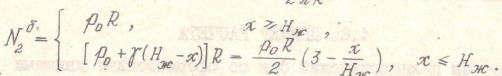
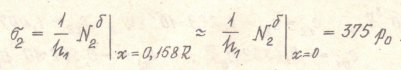

In [ ]:
def sigma2(n2):
    return 1 / h1 * n2
x = 0.158
n2 = n2_1_obka(x)
'сигма 2', sigma2(n2)

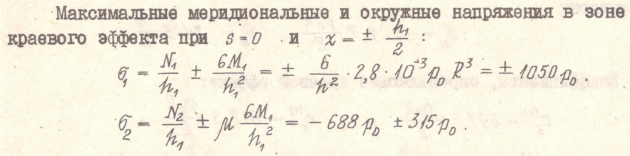

In [ ]:
m1 = mk(D1, betta1, 0, c31_num, c41_num)
x = h1 / 2
n1 = n1_1_obka(); n2 = n2_1_obka(x)

def sigma_1(n, m1, h):
    return n / h, 6 * m1 / h ** 2

def sigma_2(n, m1, h):
    return n / h, 6 * 0.3 * m1 / (h ** 2) 

sigma_1(n1, m1, h1), sigma_2(n2, m1, h1)

### оболочка 2

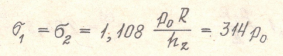

In [ ]:
n1_2_obka(fi2) / h2

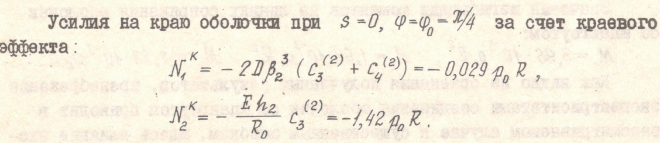

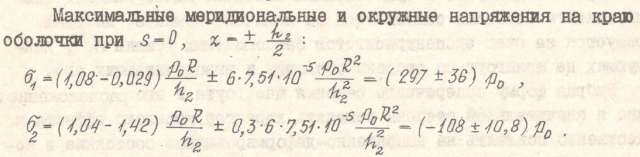

In [ ]:
m1 = mk(D2, betta2, 0, c32_num, c42_num)
x = h2 / 2
n1 = n1_2_obka(fi2); n2 = n2_2_obka(fi2)

nk1 = n1_k(D2, betta2, 0, c32_num, c42_num, fi2)
nk2 = n2_k(h2, R_0, betta2, c32_num, c42_num, 0)

def sigma_1(n, nk, m1, h):
    return (n + nk) / h, 6 * m1 / h ** 2

def sigma_2(n, nk, m1, h):
    return (n + nk) / h, 6 * 0.3 * m1 / (h ** 2) 

In [ ]:
n1, n2, nk1, nk2

In [ ]:
sigma_1(n1, nk1, m1, h2), sigma_2(n2, nk2, m1, h2)

### Оболочка 3

In [ ]:
n13 = n13; n23 = 0
m1 = mk(D3, betta3, 0, c33_num, c43_num)
def sigma_1(n, m1, h):
    return n / h, 6 * m1 / h ** 2

def sigma_2(n, m1, h):
    return n / h, 6 * 0.3 * m1 / (h ** 2) 

sigma_1(n13, m1, h3), sigma_2(n23, m1, h3)

### Шпангоут

In [ ]:
"дельта ш", u_sh

In [ ]:
"на линии центров тяжести сигма =", u_sh / r_sh

In [ ]:
"На линии соединения его с верхней цилиндрической обочкой", delta1_num / R

## Оценка влияния эксцентриситетов

In [ ]:
a1 = a2 = a3 = b1 = b2 = b3 = 0
r_sh = r2 = 1

In [ ]:
c11 = find_c11()
c11

In [ ]:
c12 = find_c12()
c12

In [ ]:
c22 = find_c22()
c22

In [ ]:
c01 = find_c01()
c01

In [ ]:

c02 = find_c02(lst_of_signs, signs)
print(c02)

In [ ]:
M1, B1 = np.array([[c11, c12], [c12, c22]]), np.array([c01, c02])
u_sh, v_sh = np.linalg.solve(M1, B1).tolist()
u_sh, v_sh

In [ ]:
delta1_num, delta2_num, delta3_num = delta1(), delta2(), delta3()
delta1_num, delta2_num, delta3_num 

### коэффициенты, определяющие краевой эффект

In [ ]:
c31_num = c31()
c32_num = c32()
c33_num = c33()
c41_num = c41()
c42_num = c42()
c43_num = c43()

print(f'C3 для первой оболочки:\n\t{c31_num},\n\
C3 для второй оболочки:\n\t{c32_num},\n\
C3 для третьей оболочки:\n\t{c33_num}')

print(f'C4 для первой оболочки:\n\t{c41_num},\n\
C4 для второй оболочки:\n\t{c42_num},\n\
C4 для третьей оболочки:\n\t{c43_num}')


## изгибающие моменты на линиях сопряжения оболочек со шпангоутом

In [ ]:
m1 = mk(D1, betta1, 0, c31_num, c41_num)
m2 = mk(D2, betta2, 0, c32_num, c42_num)
m3 = mk(D3, betta3, 0, c33_num, c43_num)

In [ ]:
m1, m2, m3